<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/statistics_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Chapter 0 Installment Extra Packages**

#####**Install Some Packages**

In [2]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####**Import Basic Modules**

In [3]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

#####**import compute_z_confidence_interval**

In [4]:
def compute_z_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_t_confidence_interval**

In [5]:
def compute_t_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    x_bar = data.mean(axis=1) # (30,)
    s_square = np.sum((data - x_bar.reshape((-1,1)))**2, axis=1) / (n-1) # (30,)
    s = np.sqrt(s_square) # (30,)

    # compute margin of error
    t_star = stats.t(df=n-1).ppf( 1 - (alpha/2) )
    margin_of_error = t_star * s / np.sqrt(n) # (30,) 

    return x_bar, margin_of_error  

#####**import compute_proportion_confidence_interval**

In [6]:
def compute_proportion_confidence_interval(data, confidence_level=None, alpha=None):
    """
    input : data : 2d numpy array of shape (n_simulations, n_samples)
                   for each row we have data to handle
                   data items are either 0 or 1
    """
    # confidence level
    if (confidence_level is None) and (alpha is None):
        confidence_level = 0.95
        alpha = 1 - confidence_level 
    elif (confidence_level is None) and (alpha is not None):
        confidence_level = 1 - alpha
    elif (confidence_level is not None) and (alpha is None):
        alpha = 1 - confidence_level 

    # number of samples
    # data = np.array( data ) # (30, 5)
    n = data.shape[1]

    # compute basic statistics
    p_hat = data.mean(axis=1) # (30,)

    # compute margin of error
    z_star = stats.norm().ppf( 1 - (alpha/2) )
    margin_of_error = z_star * np.sqrt( p_hat * ( 1 - p_hat ) / n ) # (30,) 

    return p_hat, margin_of_error  

#####**import compute_z_score**

In [7]:
def compute_z_score(x, mu, sigma):
    return ( x - mu ) / sigma

### **Chapter 11 Testing**

####**Section 3 z Score and p-value**

#####**Example - Ludwig's Philosopy Exam Score [eng](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/normal-distributions-calculations/v/z-table-for-proportion-above?modal=1)**

A set of philosophy exam scores are normally distributed with a mean of 40 points and a standard deviation of three points. Ludwig got a score of 47.5 points on the exam. What proportion of exam scores are higher than Ludwig's score? 

######**Solution**

proportion of student philosophy exam scores that are higher than Ludwig's : 0.0062



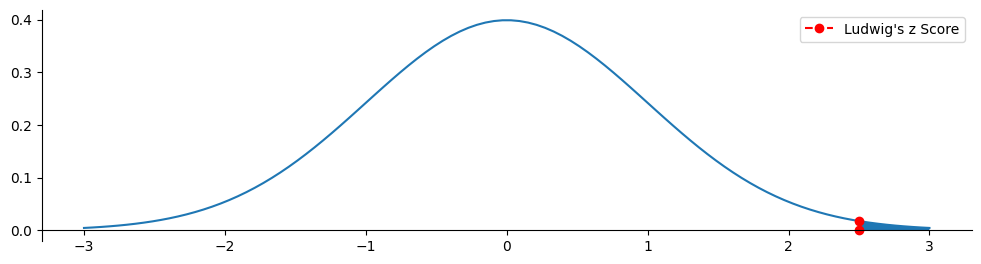

In [8]:
def main():
    mu, sigma, score = 40, 3, 47.5
    z_score = compute_z_score(score, mu, sigma)
    sf = stats.norm().sf(z_score)
    print(f"proportion of student philosophy exam scores that are higher than Ludwig's : {sf:.4f}", end="\n\n")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.linspace(-3,3,100), stats.norm().pdf(np.linspace(-3,3,100)))
    x = z_score
    y = stats.norm().pdf(x) 
    ax.plot([x,x], [0,y], "--or", label="Ludwig's z Score")
    ax.fill_between(np.linspace(z_score,3,100), stats.norm().pdf(np.linspace(z_score,3,100)), np.zeros(100))
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    plt.show()

if __name__ == "__main__":
    main()